### Import Library

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

import joblib
import os

### Import Dataset

In [29]:
df = pd.read_csv('data/color_moments_features.csv')
df.head()

,means_R,means_G,means_B,std_R,std_G,std_B,skew_R,skew_G,skew_B,label
0,40.995239,68.176025,119.509827,44.623923,59.750524,96.522861,1.615381,0.307378,-0.278286,adonis
1,60.121216,65.617676,85.454468,62.908407,67.580879,86.360119,0.664770,0.507067,0.316832,adonis
2,68.952332,82.538208,99.219788,71.031147,83.927081,102.458392,0.262572,0.174306,0.187708,adonis
3,41.682678,58.732178,81.892761,57.280605,72.071545,99.709890,1.379904,0.661019,0.495775,adonis
4,52.092285,65.668762,90.496643,53.923753,64.440779,87.252135,0.612878,0.242294,0.069937,adonis


### Melihat informasi dataset seperti jumlah baris dan kolom, tipe data, dan memori yang digunakan

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   means_R  277 non-null    float64
 1   means_G  277 non-null    float64
 2   means_B  277 non-null    float64
 3   std_R    277 non-null    float64
 4   std_G    277 non-null    float64
 5   std_B    277 non-null    float64
 6   skew_R   277 non-null    float64
 7   skew_G   277 non-null    float64
 8   skew_B   277 non-null    float64
 9   label    277 non-null    object 
dtypes: float64(9), object(1)
memory usage: 21.8+ KB


### Melihat Korelasi antar fitur, persebaran data, hingga jarak antar label berdasarkan fitur yang ada

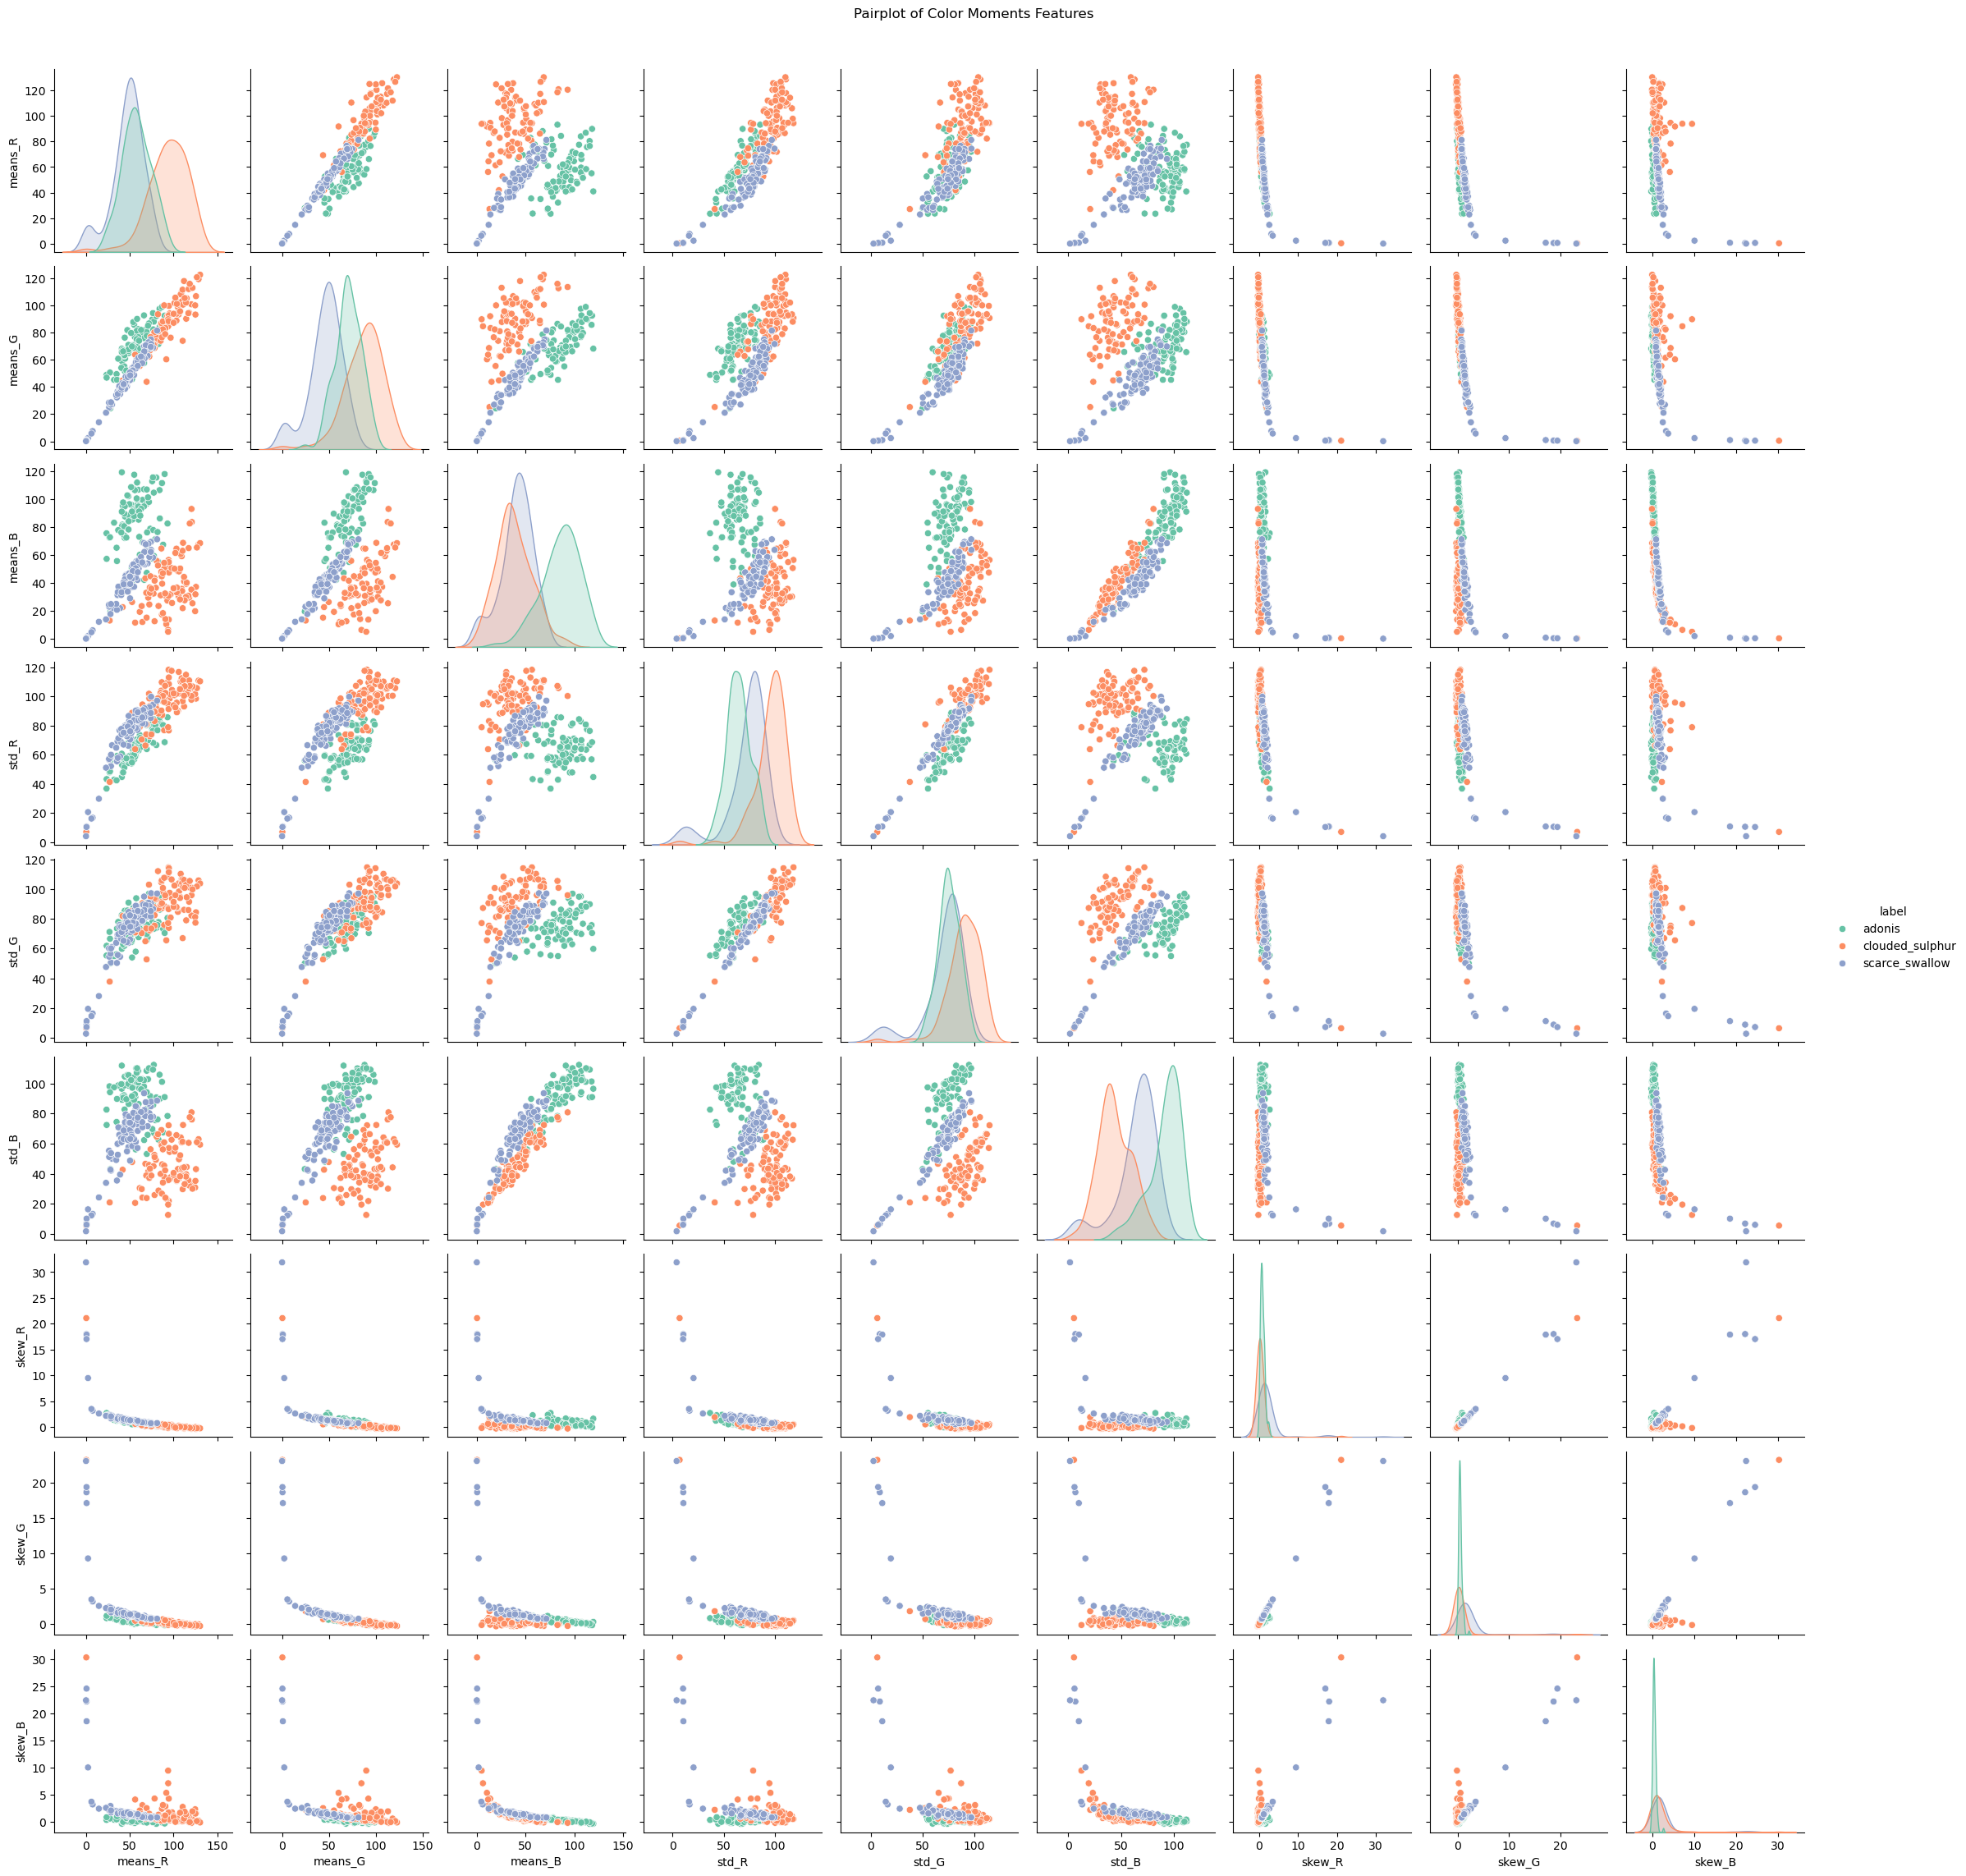

In [31]:
sns.pairplot(df, hue='label', diag_kind='kde', markers='o', palette='Set2')
plt.suptitle("Pairplot of Color Moments Features", y=1.02)
plt.show()

### Melihat perbandingan fitur berdasarkan label

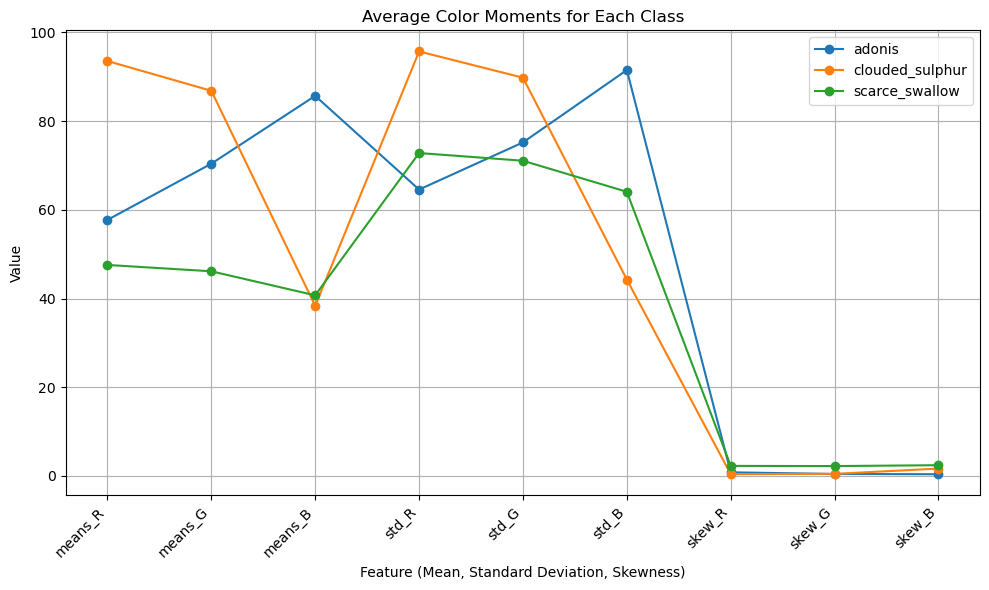

In [32]:
labels = df['label']
df = df.drop(columns=['label'])
average_moments = df.groupby(labels).mean()

plt.figure(figsize=(10, 6))

for class_name, moments in average_moments.iterrows():
    plt.plot(moments.index, moments.values, label=class_name, marker='o')

plt.title("Average Color Moments for Each Class")
plt.xlabel("Feature (Mean, Standard Deviation, Skewness)")
plt.ylabel("Value")
plt.xticks(rotation=45, ha='right')
plt.legend(loc="upper right")
plt.grid(True)
plt.tight_layout()

plt.show()


### Pemilihan fitur dan label

In [33]:
X = df.drop(columns=['skew_R', 'skew_G', 'skew_B'])
y = labels

### Mencari nilai neighbor yang paling sesuai

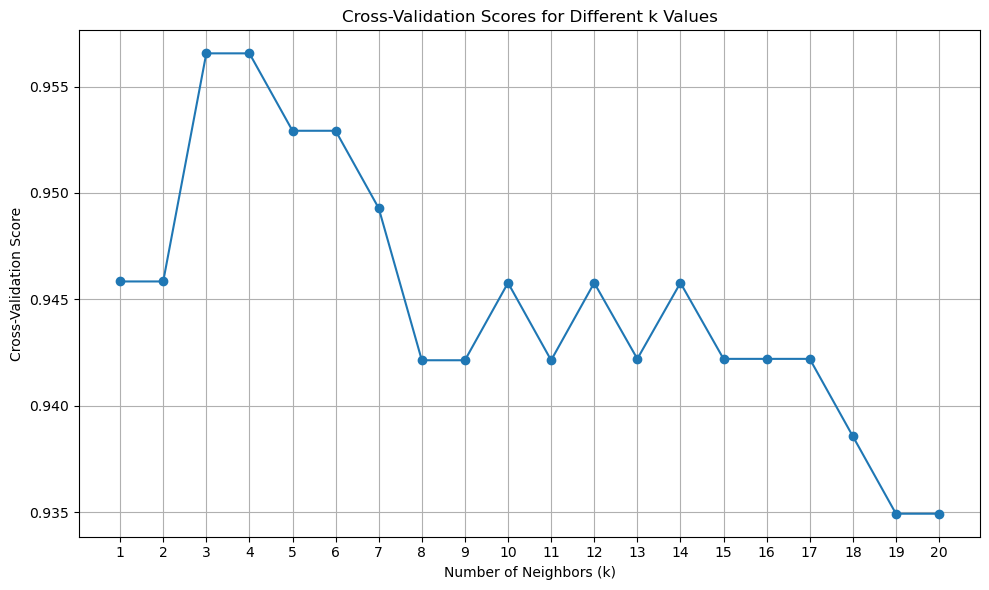

In [42]:
cross_val_scores = []

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5)
    cross_val_scores.append(scores.mean())

plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), cross_val_scores, marker='o')
plt.title("Cross-Validation Scores for Different k Values")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Cross-Validation Score")
plt.xticks(range(1, 21))
plt.grid(True)
plt.tight_layout()
plt.show()

### Uji coba model dengan kombinasi rasio train dan test

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [38]:
print(classification_report(y_test, knn.predict(X_test)))

                 precision    recall  f1-score   support

         adonis       1.00      0.90      0.95        20
clouded_sulphur       0.93      0.93      0.93        15
 scarce_swallow       0.91      1.00      0.95        21

       accuracy                           0.95        56
      macro avg       0.95      0.94      0.95        56
   weighted avg       0.95      0.95      0.95        56



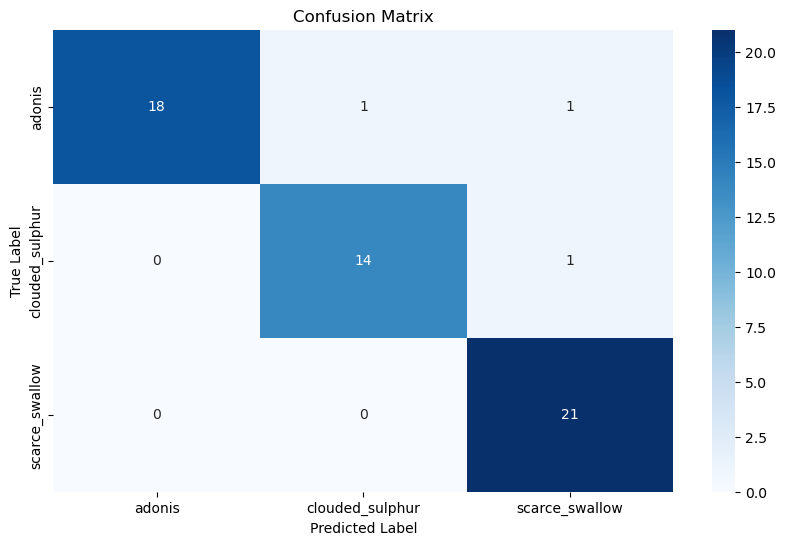

In [39]:
conf_matrix = confusion_matrix(y_test, knn.predict(X_test))

plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [44]:
print(classification_report(y_test, knn.predict(X_test)))

                 precision    recall  f1-score   support

         adonis       1.00      0.96      0.98        28
clouded_sulphur       1.00      0.96      0.98        25
 scarce_swallow       0.94      1.00      0.97        31

       accuracy                           0.98        84
      macro avg       0.98      0.97      0.98        84
   weighted avg       0.98      0.98      0.98        84



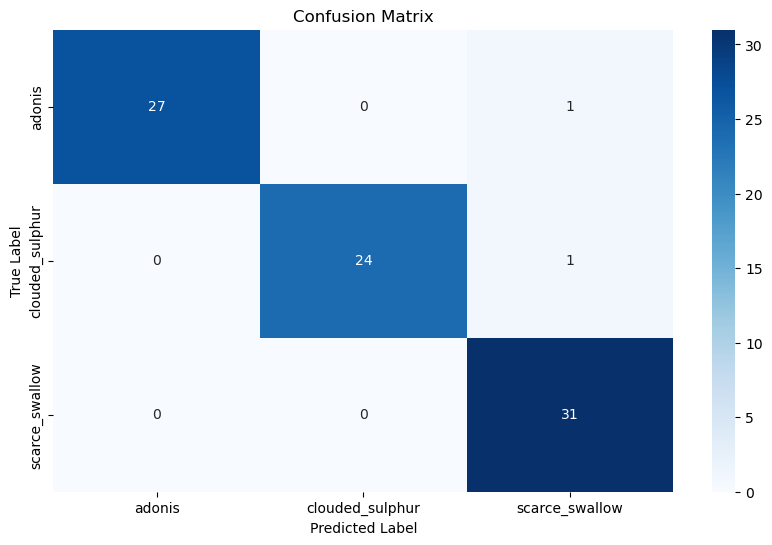

In [45]:
conf_matrix = confusion_matrix(y_test, knn.predict(X_test))

plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [47]:
print(classification_report(y_test, knn.predict(X_test)))

                 precision    recall  f1-score   support

         adonis       1.00      0.91      0.96        35
clouded_sulphur       1.00      0.97      0.99        38
 scarce_swallow       0.90      1.00      0.95        38

       accuracy                           0.96       111
      macro avg       0.97      0.96      0.96       111
   weighted avg       0.97      0.96      0.96       111



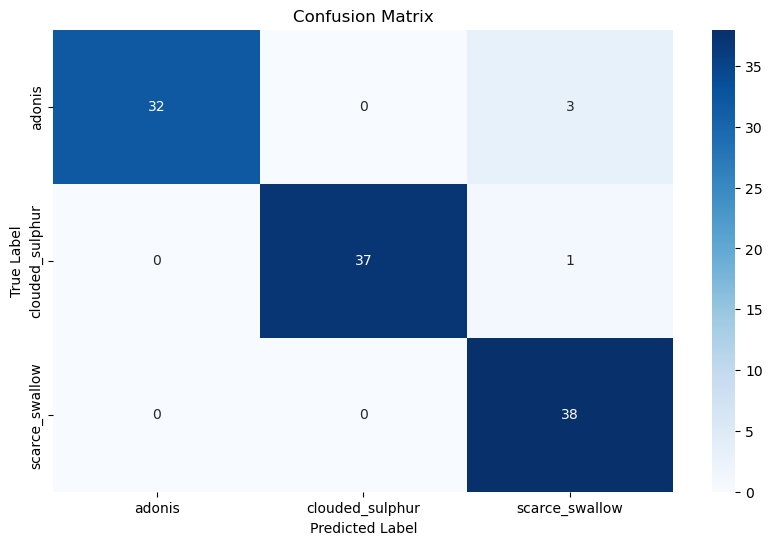

In [48]:
conf_matrix = confusion_matrix(y_test, knn.predict(X_test))

plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Kesimpulan  
Model 2 menunjukkan akurasi tertinggi sebesar 0.98 ketika menggunakan rasio data latih dan uji sebesar 0.7:0.3 serta jumlah neighbor sebanyak 3.